In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb





In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


In [4]:
stock = pd.read_csv("/content/archive.zip")

In [6]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
stock.shape

(2416, 7)

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [9]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# EXPLORATORY DATA ANALYSIS

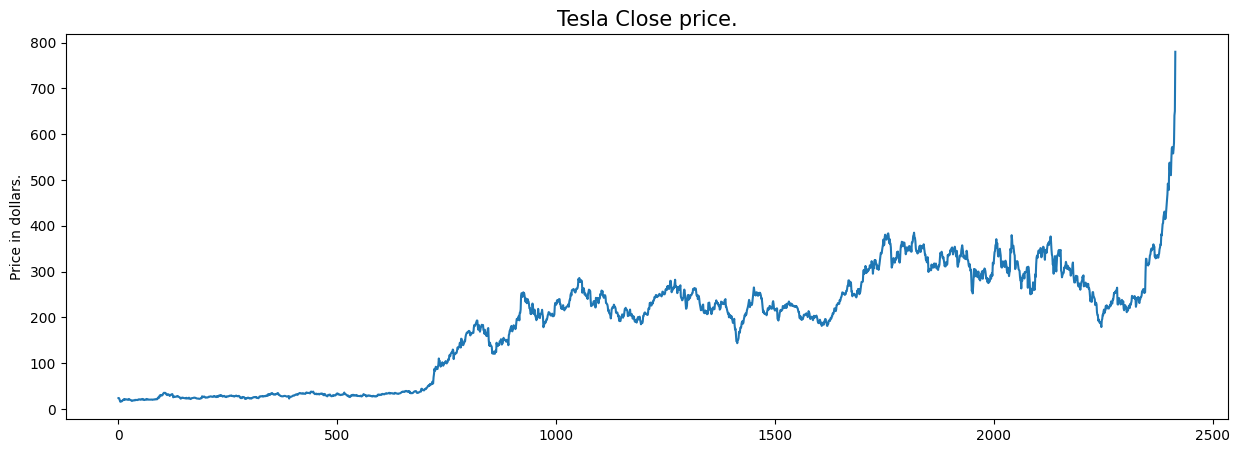

In [12]:
plt.figure(figsize=(15,5))
plt.plot(stock['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [13]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [16]:
  stock[stock['Close'] == stock['Adj Close']].shape


(2416, 7)

In [19]:
stock = stock.drop(['Adj Close'], axis=1)


In [20]:
stock.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

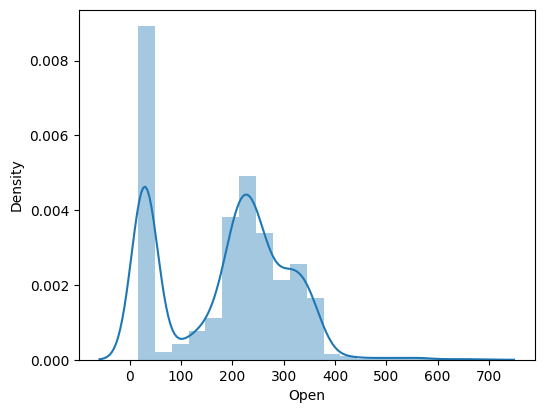

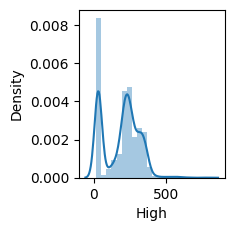

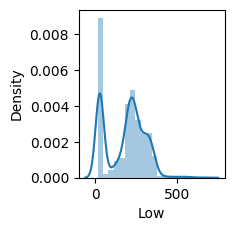

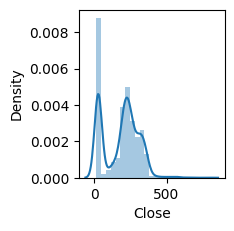

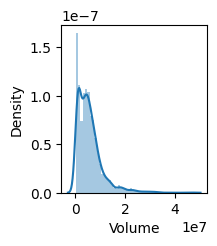

In [21]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
   plt.subplot(2,3,i+1)
   sb.distplot(stock[col])
   plt.show()


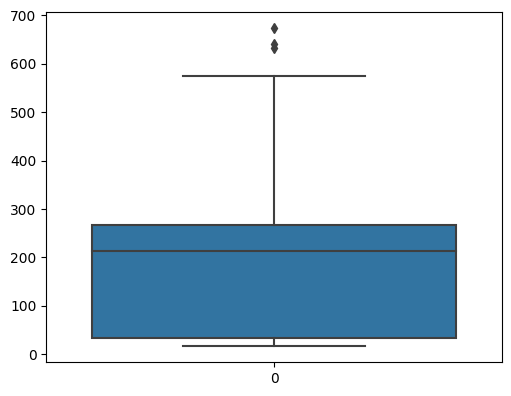

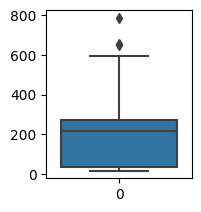

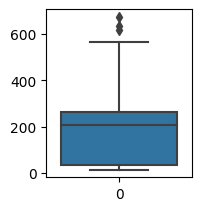

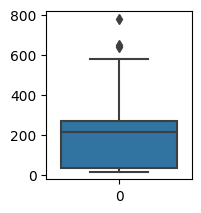

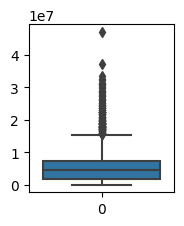

In [23]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(stock[col])
    plt.show()


#FEATURE ENGINEERING

In [34]:
splitted = stock['Date'].str.split('-', expand=True)

stock['day'] = splitted[1].astype('int')
stock['month'] = splitted[0].astype('int')
stock['year'] = splitted[2].astype('int')

stock.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6


In [35]:
stock['is_quarter_end'] = np.where(stock['month']%3==0,1,0)
stock.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2,1
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6,1


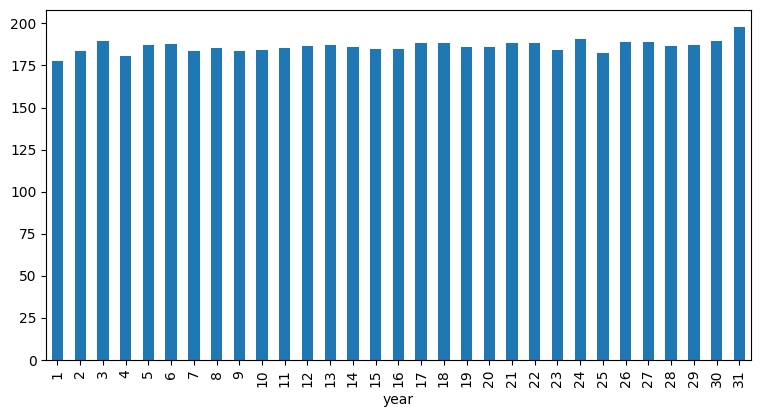

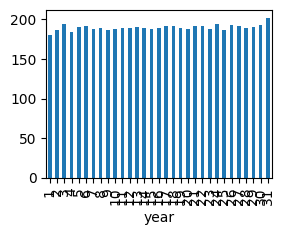

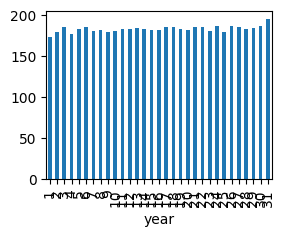

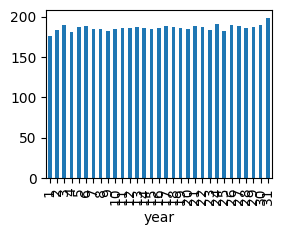

In [37]:
data_grouped = stock.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
    plt.show()


In [39]:
stock.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,195.383850,198.830719,191.934386,195.566477,5.012534e+06,6.455556,2014.578431,15.760784
1,170.534763,173.600440,167.344233,170.580711,6.540089e+06,6.972912,2015.119639,15.726862


In [40]:
stock['open-close'] = stock['Open'] - stock['Close']
stock['low-high'] = stock['Low'] - stock['High']
stock['target'] = np.where(stock['Close'].shift(-1) > stock['Close'], 1, 0)


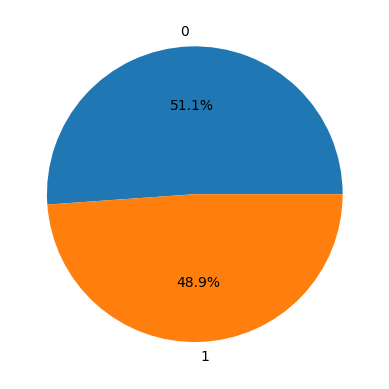

In [42]:
plt.pie(stock['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


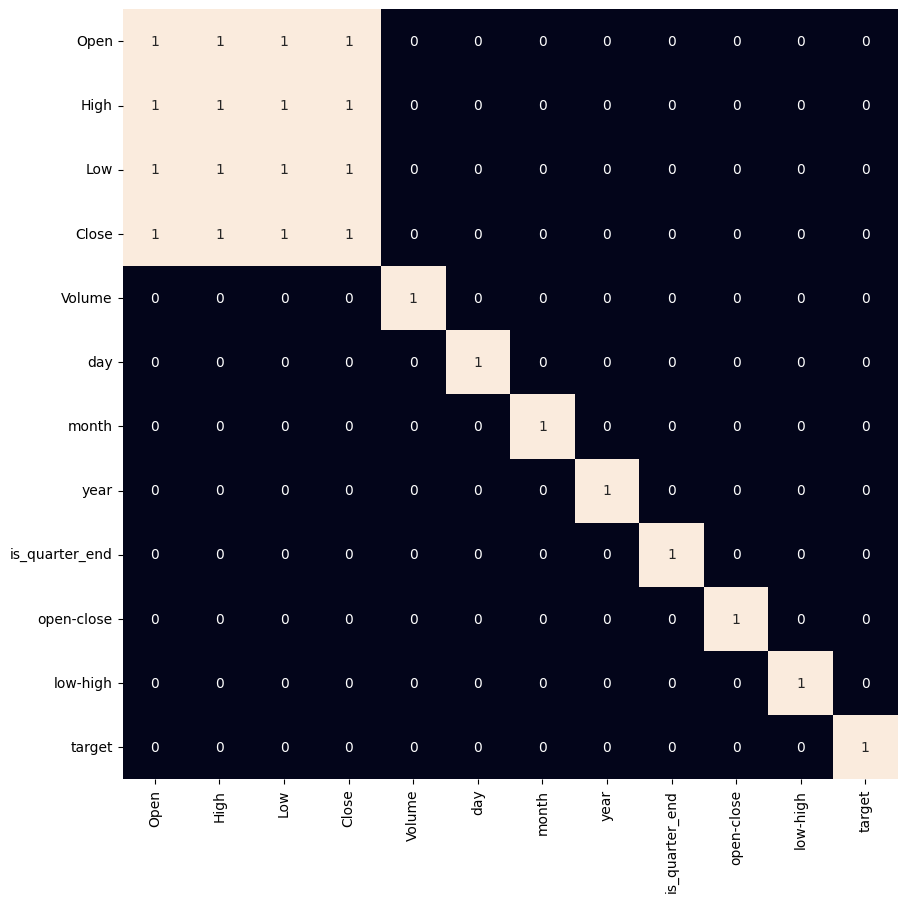

In [44]:
plt.figure(figsize=(10, 10))

sb.heatmap(stock.corr() > 0.9, annot=True, cbar=False)
plt.show()


#DATA SPLITTING AND NORMALISATION

In [45]:
features = stock[['open-close', 'low-high', 'is_quarter_end']]
target = stock['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


# MODEL DEVELOPMENT AND EVALUATION

In [47]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
   models[i].fit(X_train, Y_train)

   print(f'{models[i]} : ')
   print('Training Accuracy : ', metrics.roc_auc_score(
	    Y_train, models[i].predict_proba(X_train)[:,1]))
   print('Validation Accuracy : ', metrics.roc_auc_score(
	    Y_valid, models[i].predict_proba(X_valid)[:,1]))
   print()


LogisticRegression() : 
Training Accuracy :  0.5089337346592329
Validation Accuracy :  0.5124521072796935

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4776074541629095
Validation Accuracy :  0.5247673782156541

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accura